In [1]:
NLS=[[],[],[]]
with open("./NLS_Group16.txt",'r') as nls:
    lines=nls.readlines()
    for n in range(3):
        for i in (lines[500*n+1:(n+1)*500+1]):
            a,b = i.split(" ")[0:2];
            a,b = float(a), float(b)
            NLS[n].append([a,b])

In [2]:
from matplotlib import pyplot as plt

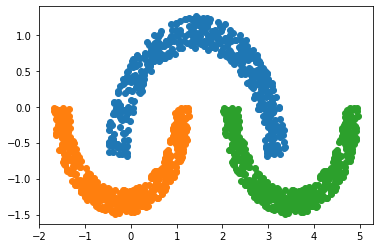

In [3]:
for nls in NLS:
    plt.scatter([i[0] for i in nls],[i[1] for i in nls])

In [4]:
print(len(NLS))
for i in NLS:
    print(len(i))

3
500
500
500


In [5]:
from GMM_MODEL import *

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
print(NLS[0])

[[0.252976, 0.322817], [0.177614, 0.402176], [1.501707, 0.977546], [2.223671, 1.027652], [2.52614, 0.333931], [0.648536, 0.682983], [1.415116, 1.025749], [1.844002, 0.830896], [2.963463, 0.456604], [1.620555, 1.037601], [-0.293847, 0.189714], [2.819946, 0.543163], [1.660877, 1.138622], [0.425278, 0.733101], [0.197968, 0.682968], [3.167735, -0.330975], [2.359756, 0.83624], [2.313627, 0.722727], [3.103092, -0.032352], [1.672528, 1.23117], [2.531814, 0.486793], [0.905375, 1.066786], [-0.040659, 0.368947], [2.830677, 0.180962], [-0.065546, -0.010812], [1.45248, 1.151042], [-0.247738, -0.137479], [2.138617, 0.782348], [2.818599, 0.590906], [2.027982, 0.924145], [2.897427, 0.411173], [2.123196, 0.881337], [1.589955, 0.9195], [3.035846, -0.214791], [-0.173861, -0.363257], [-0.278334, -0.052847], [0.730783, 0.675265], [3.110505, 0.043586], [1.757019, 0.996355], [1.496242, 0.910408], [1.696175, 0.885296], [1.911142, 0.954074], [2.394893, 0.459252], [-0.152317, -0.458246], [2.256279, 0.658961], 

In [7]:
# splitting the data into train data and test data
# split a list into two with a given ratio
def SplitList(l,ratio):
    middle = round(len(l)*ratio)
    return l[:middle] ,l[middle:]
TrainData = []
TestData = []
for cls in NLS:
    Train, Test = SplitList(cls, 0.7)
    TrainData.append(Train)
    TestData.append(Test)


In [8]:
K=8
model=Bayes_Classifier_GMM(K)

In [9]:
likelihood = model.train(TrainData,20)

center : [[2.3910883076923075, 0.7161813846153845], [1.9047973611111115, 0.9112234166666668], [2.8898224848484855, 0.2655541212121212], [2.6565046363636364, 0.689523], [2.9214535555555554, 0.017698000000000002], [3.113019416666667, -0.35342629166666667], [0.46758741142857163, 0.4851025028571428], [2.5141757499999997, 0.45384574999999994]]
center : [[2.370162633333334, 0.7323724999999999], [1.663996928571429, 0.978703714285714], [2.88159296, 0.29640739999999993], [2.69524225, 0.66210125], [2.998915076923076, -0.0025703461538461527], [3.1287452972972964, -0.43217454054054055], [0.21342432374100717, 0.3430215179856116], [2.5636559333333335, 0.43310473333333327]]
center : [[2.3247374473684213, 0.7598724210526315], [1.5002734285714285, 0.9857682207792209], [2.87671264, 0.29535923999999997], [2.716789285714286, 0.6366542857142857], [3.004435310344827, -0.023410448275862066], [3.13908094117647, -0.45153470588235295], [0.12747184799999994, 0.273770808], [2.5636559333333335, 0.43310473333333327

In [10]:
print([l[0] for l in likelihood])

[[1, -429.79333307662165], [1, -389.8224969558048], [1, -383.1507820794738]]


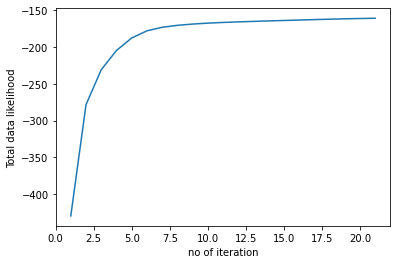

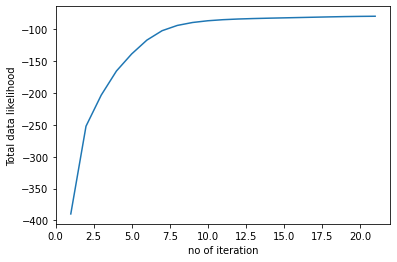

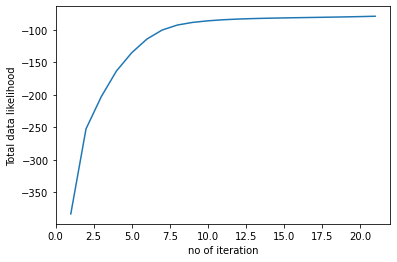

In [11]:
for l in likelihood:
    plt.plot([L[0] for L in l],[L[1] for L in l])
    plt.xlabel("no of iteration")
    plt.ylabel("Total data likelihood")
    plt.show()

In [19]:
print([l[0] for l in likelihood])

[[1, -429.79333307662165], [1, -389.8224969558048], [1, -383.1507820794738]]


In [13]:
n=0
for i in model.classes:
        n += 1
        print("Class", n)
        print("Mean:\n", [cl.mean for cl in i.clusters])
        print("Covariance:\n", [cl.covariance for cl in i.clusters])
        print("Prior:\n", i.prior)
        print("")

Class 1
Mean:
 [array([1.56884226, 0.95276097]), array([0.58968485, 0.76888644]), array([2.62437201, 0.53058386]), array([2.08075955, 0.81519033]), array([2.80705382, 0.30444593]), array([ 3.07728114, -0.28160848]), array([-0.13785043, -0.07055445]), array([2.05815737, 0.83433008])]
Covariance:
 [array([[ 0.0712263 , -0.00720468],
       [-0.00720468,  0.01335772]]), array([[0.10400553, 0.04635302],
       [0.04635302, 0.03744772]]), array([[ 0.05495955, -0.04695854],
       [-0.04695854,  0.06633655]]), array([[ 0.14988418, -0.09068171],
       [-0.09068171,  0.06668082]]), array([[ 0.06438106, -0.07398194],
       [-0.07398194,  0.11866806]]), array([[ 0.01755386, -0.01170469],
       [-0.01170469,  0.07240376]]), array([[0.04278475, 0.05593716],
       [0.05593716, 0.14496515]]), array([[ 0.14806554, -0.08720031],
       [-0.08720031,  0.06377092]])]
Prior:
 1

Class 2
Mean:
 [array([-0.853297  , -1.15299689]), array([ 0.84577  , -0.7583595]), array([ 0.54161797, -1.05406495]), arra

In [14]:
confusion = model.test(TestData)
confusion.print()

confusion matrix: 
[[150.   0.   0.]
 [  0. 150.   0.]
 [  0.   0. 150.]]
accuracy:  1.0
precision:  [1.0, 1.0, 1.0]
recall:  [1.0, 1.0, 1.0]
f1_score:  [1.0, 1.0, 1.0]


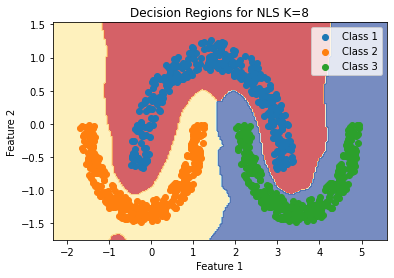

In [15]:
model.plot_decision_regions_2d(f"NLS K={K}",TrainData)

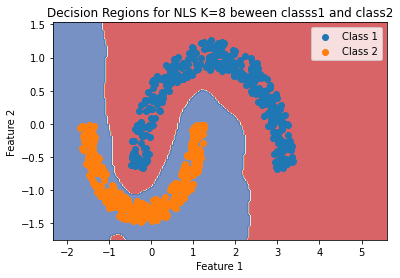

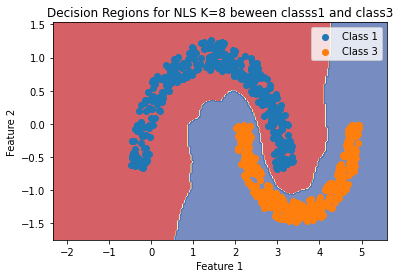

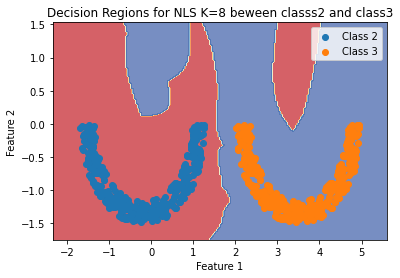

In [16]:
model.plot_decision_regions_for_each_pair_of_classes(f"NLS K={K}",TrainData)

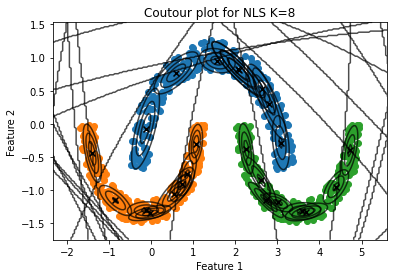

In [17]:
model.plot_contour(f"NLS K={K}",TrainData)